# Finite Difference Methods
Finite Difference Methods (FDM) are one of the popular numerical methods used in computational finance. FDM are discretizations used for solving differential equations by approximating them with difference equations. It is one of the simplest and the oldest methods to solve differential equations. These techniques were applied to numerical applications as early as 1950s.
FDM are similar in approach to the (binomial) tress. However, instead of discretizing asset prices and the passage of time in a tree structure, it discretizes in a grid - with time and price steps - by calculating the value at every possible grid points.
Explicit, Implicit and Crank-Nicolson are the three popular approaches of FDM. The explicit methods are simple to implement, but it does not always converge and largely depends on the size of the time and asset step. Explicit methods are unstable when compared to other two methods. Finite Difference approach is peferred for low dimensional problem, usually upto 4 dimensions.

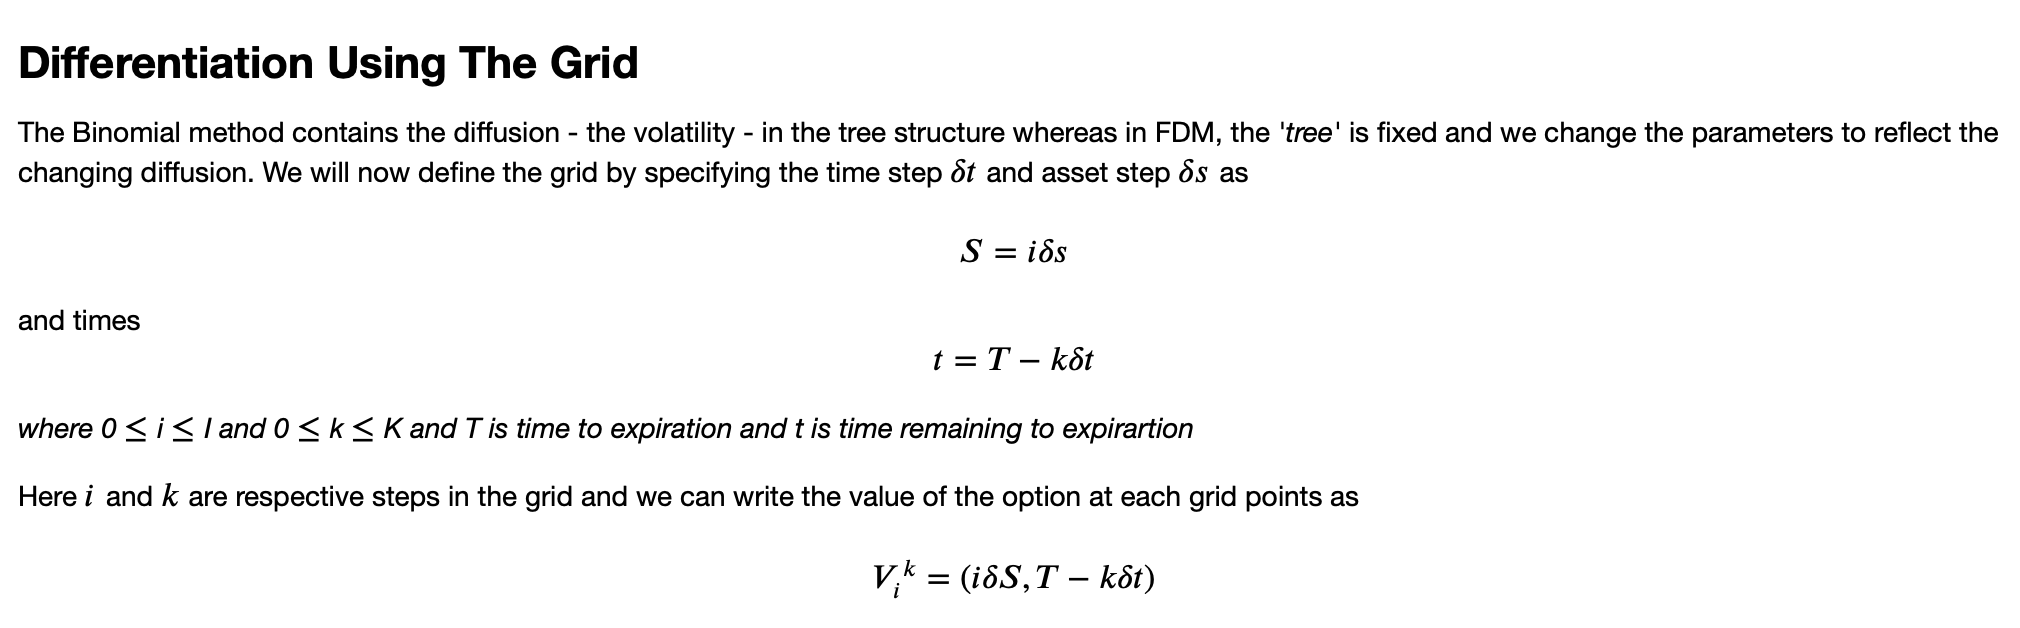

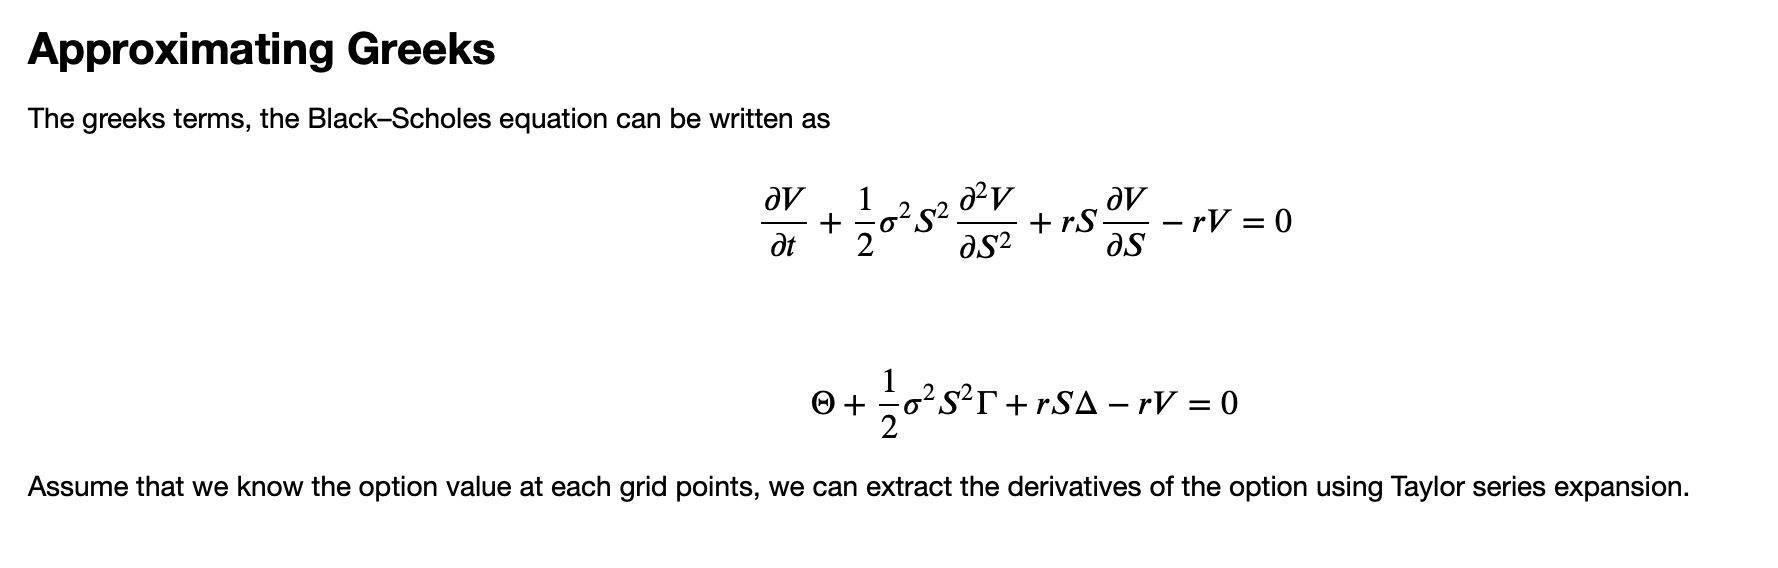

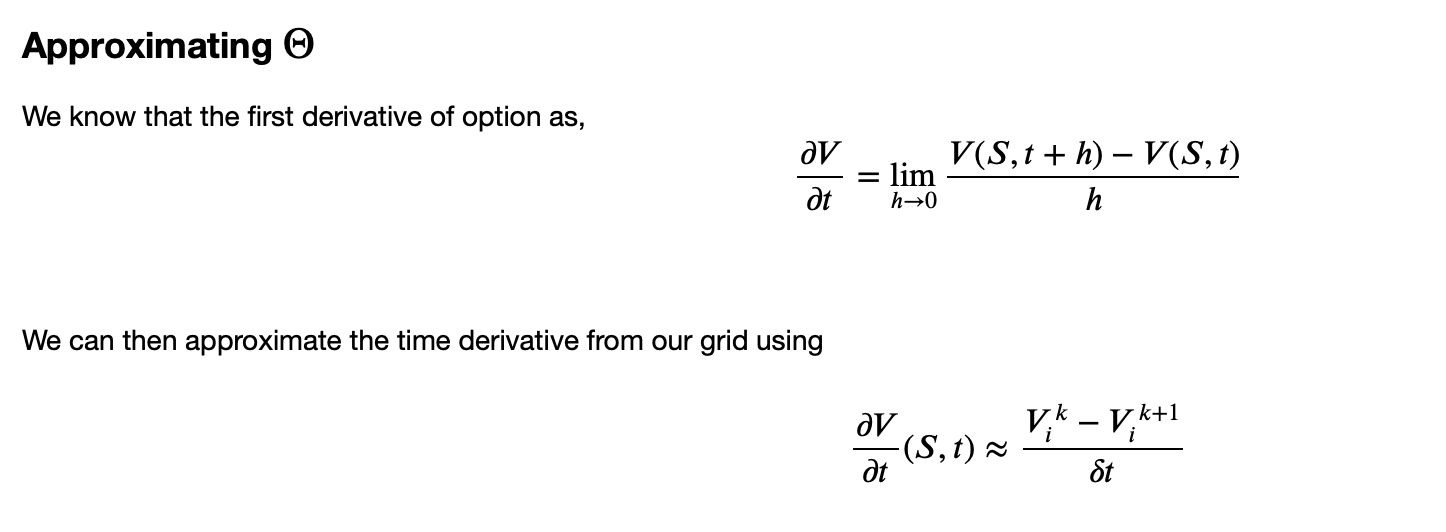

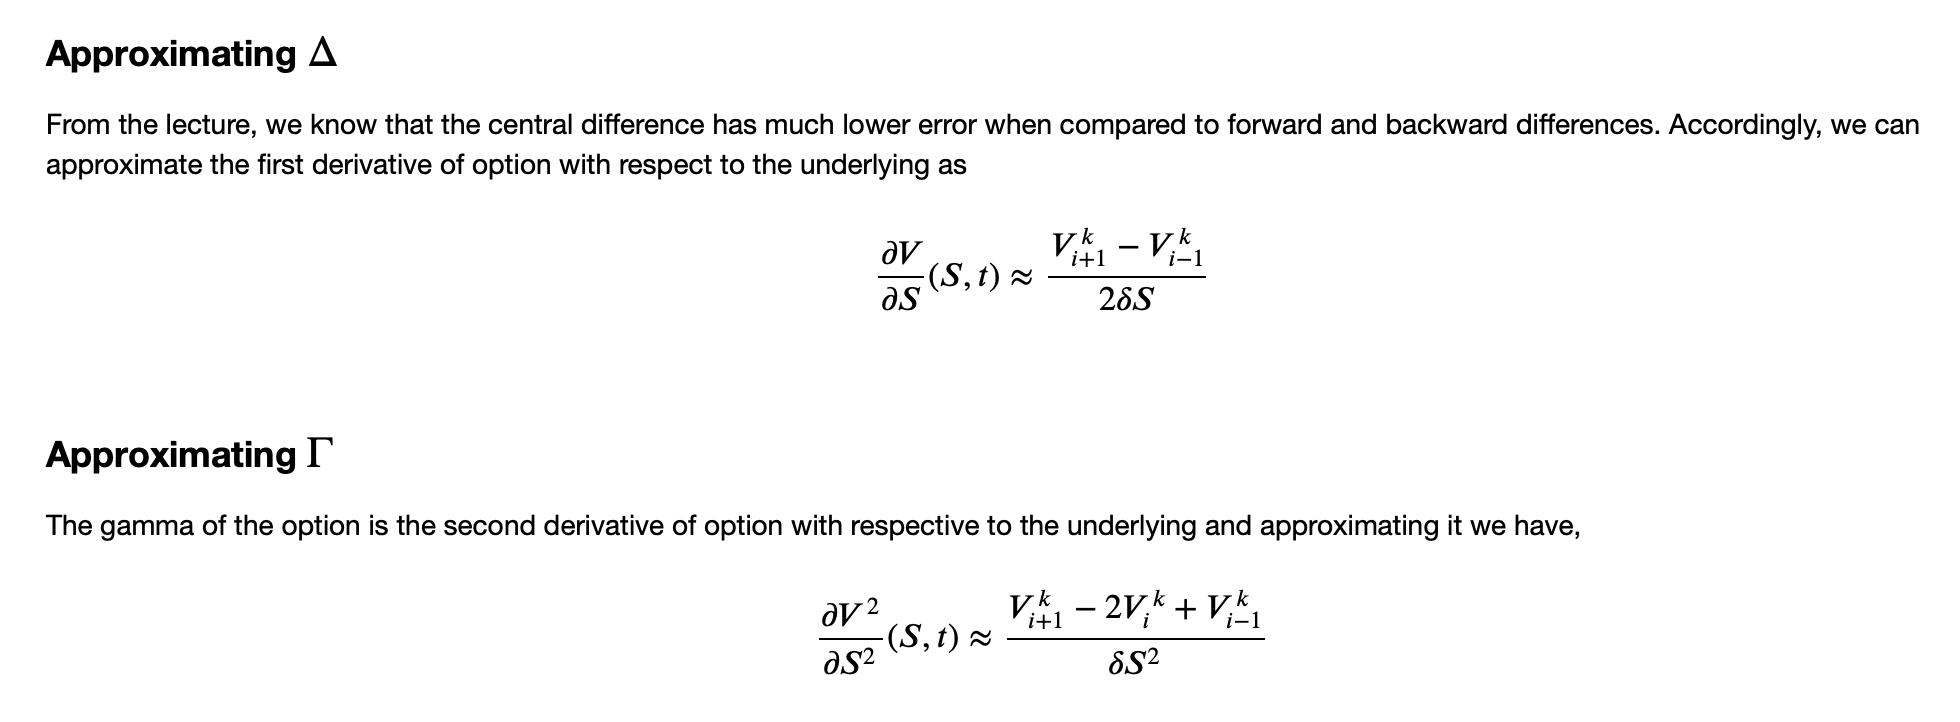

In [1]:
# Importing libraries
import pandas as pd
from numpy import *

import cufflinks as cf
cf.set_config_file(offline=True, dimensions=((1000,600)), theme = 'white')

# Set max row and columns to 50
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

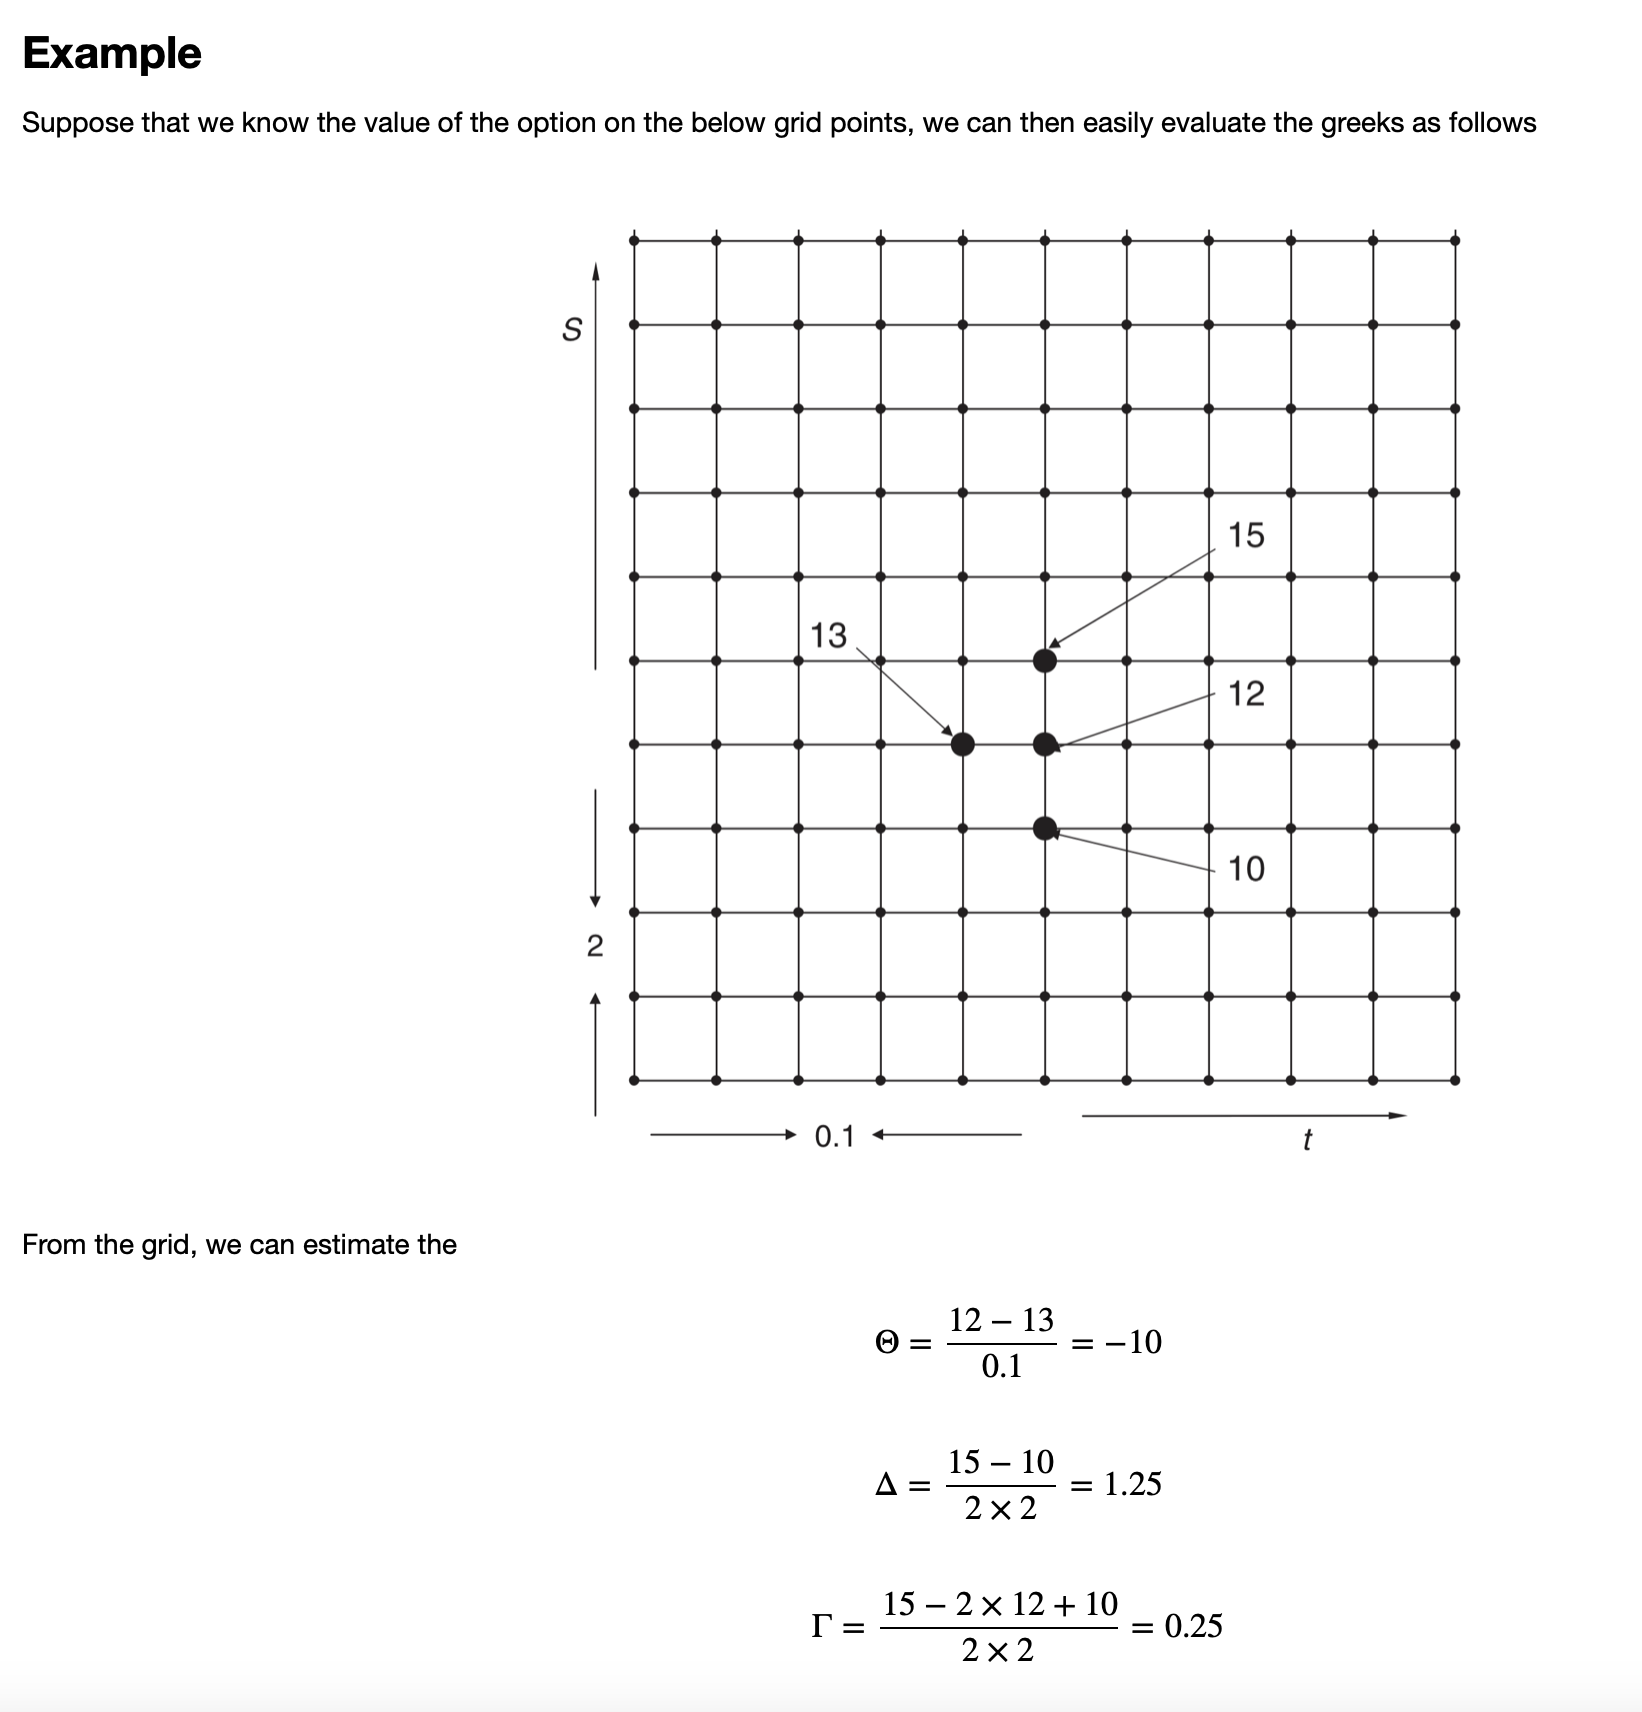

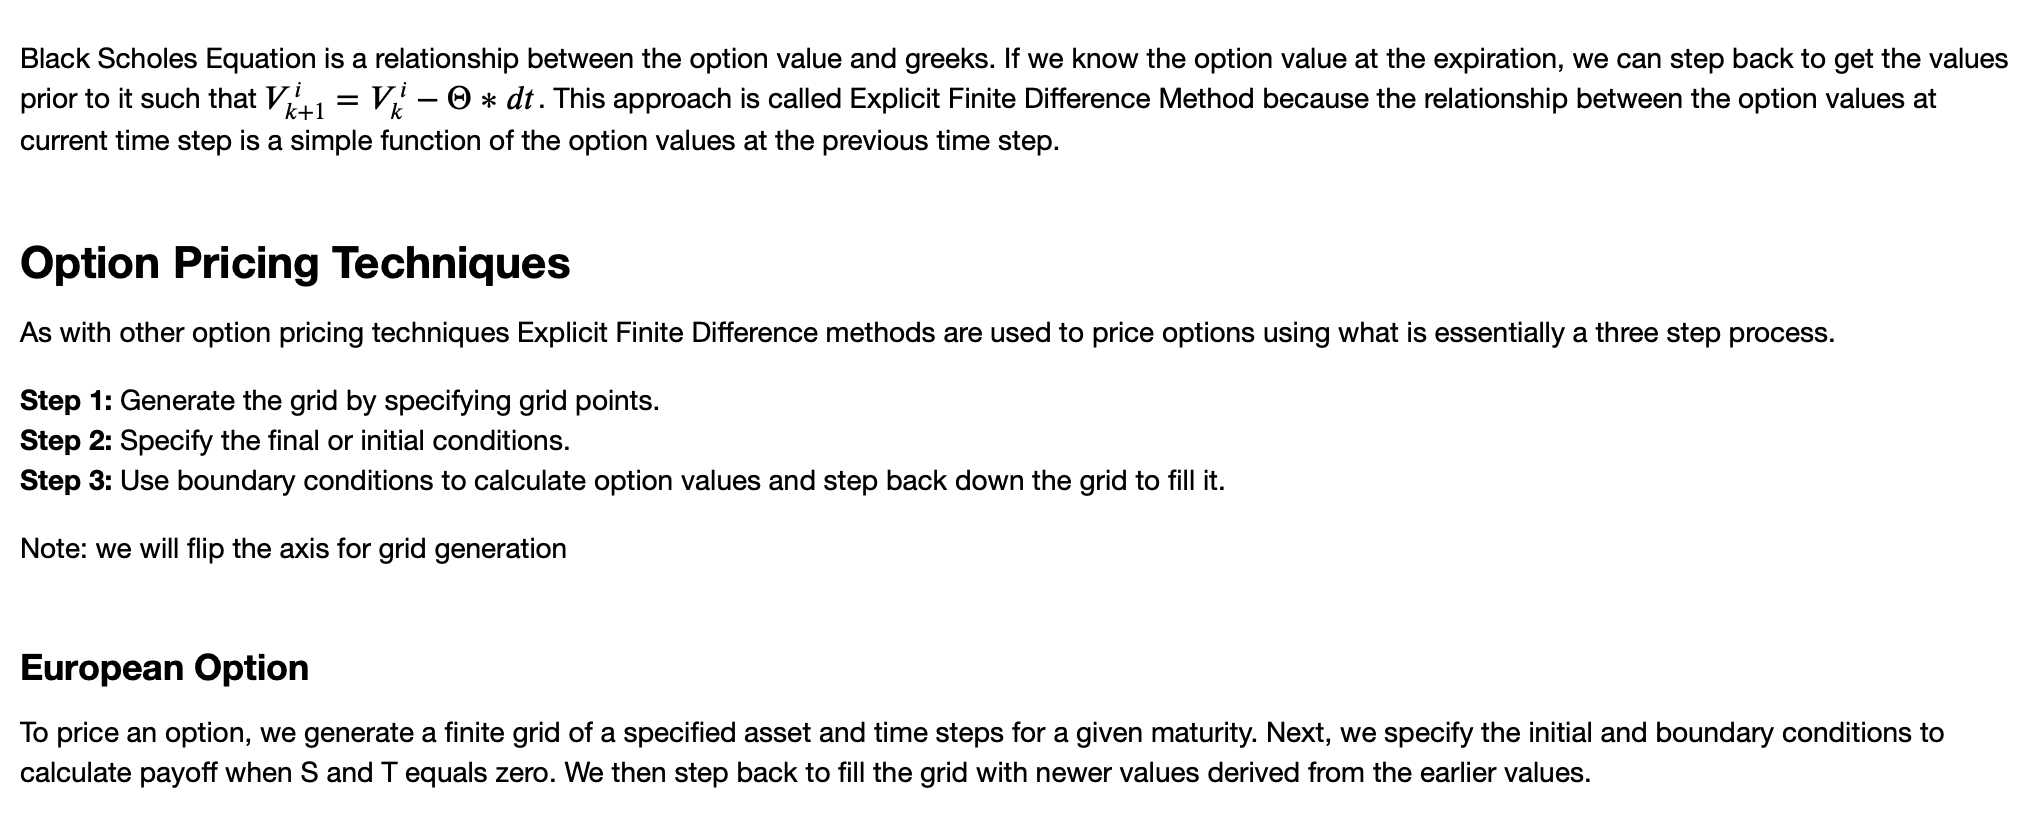

In [2]:
# Specify parameters for FDM 
T = 1                       # time to maturity in years
E = 100                     # strike price
r = 0.05                    # risk free rate
vol = 0.20                  # volatility
Flag = 1                    # Flag 1 for call, -1 for puts
NAS = 20                    # number of asset steps

ds = 2*E/NAS                # asset step size
dt = (0.9/vol**2/NAS**2)    # time steps size, for stability

NTS = int(T/dt)+1            # number of time steps
dt = T/NTS                  # time step

## Step 1
Let's now build the grid with the above input parameters

In [3]:
# Create asset steps i*ds
s = arange(0, (NAS+1)*ds, ds)
s

array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
       110., 120., 130., 140., 150., 160., 170., 180., 190., 200.])

In [4]:
# Create time steps 
t = arange(0, (NTS+1)*dt, dt)
t

array([0.        , 0.05555556, 0.11111111, 0.16666667, 0.22222222,
       0.27777778, 0.33333333, 0.38888889, 0.44444444, 0.5       ,
       0.55555556, 0.61111111, 0.66666667, 0.72222222, 0.77777778,
       0.83333333, 0.88888889, 0.94444444, 1.        ])

In [5]:
# Verify the steps size
s.shape, t.shape

((21,), (19,))

In [6]:
# Initialize the grid with zeros
grid = zeros((len(s), len(t)))

# Subsume the grid points into a dataframe
# with asset price as index and time steps as columns
grid = pd.DataFrame(grid, index=s, columns=around(t,3))
grid

,0.000,0.056,0.111,0.167,0.222,0.278,0.333,0.389,0.444,0.500,0.556,0.611,0.667,0.722,0.778,0.833,0.889,0.944,1.000
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


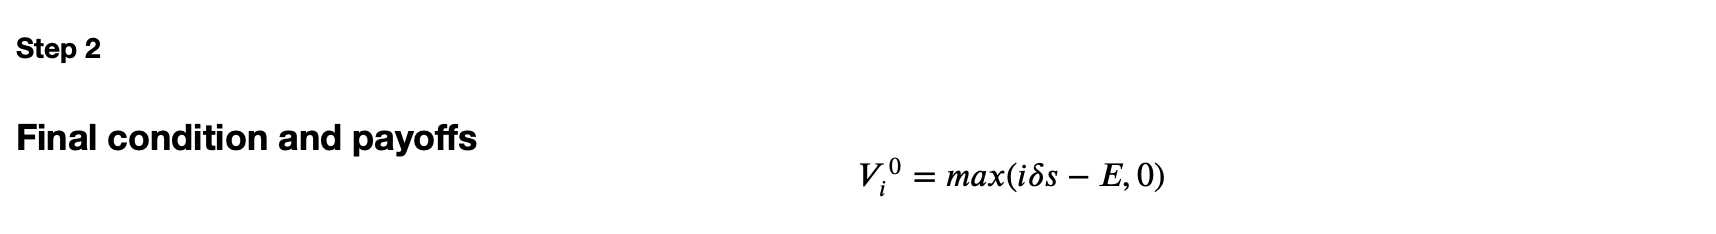

In [7]:
# Set Final or Initial condition at Expiration
if Flag==1:
    grid.iloc[:,0] = maximum(s-E,0)
else:
    grid.iloc[:,0] = maximum(E-s,0)

In [8]:
# Verify the grid
grid

,0.000,0.056,0.111,0.167,0.222,0.278,0.333,0.389,0.444,0.500,0.556,0.611,0.667,0.722,0.778,0.833,0.889,0.944,1.000
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


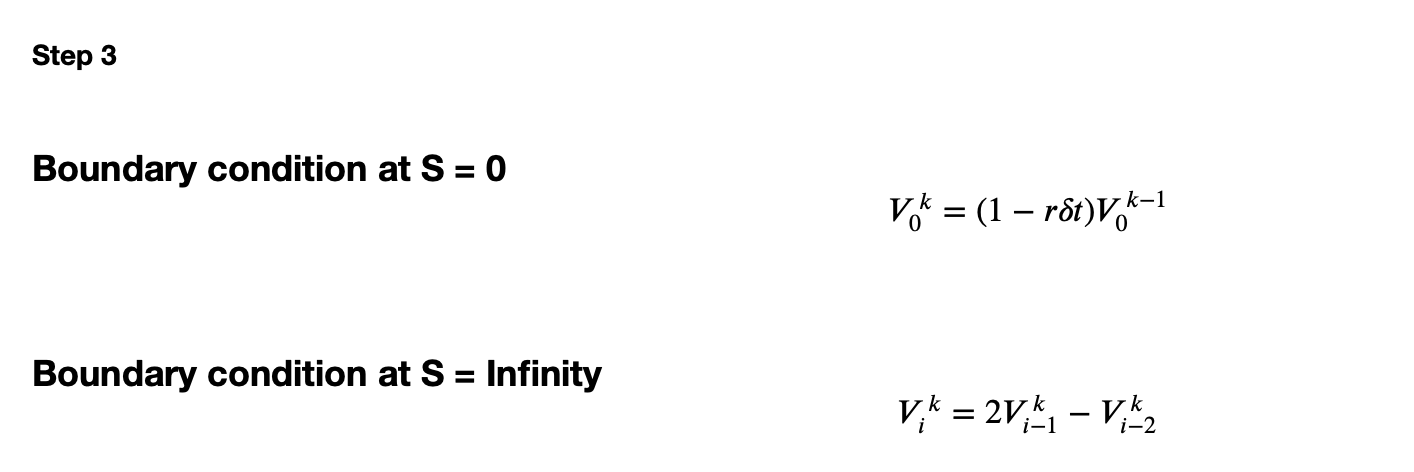

In [9]:
# fill the grid
# k is a counter here = t = ttm

for k in range(1, len(t)):
    for i in range(1, len(s)-1):
        delta = (grid.iloc[i+1,k-1] - grid.iloc[i-1,k-1]) / (2*ds)
        gamma = (grid.iloc[i+1,k-1]-2*grid.iloc[i,k-1]+grid.iloc[i-1,k-1])/(ds**2)
        theta = (-0.5*vol**2*s[i]**2*gamma) - (r*s[i]*delta) + (r*grid.iloc[i,k-1])

        grid.iloc[i,k] = grid.iloc[i,k-1] - (theta*dt)

    # set boundary condition at s=0
    # ds = rsdt + sigma*sdx, when s=0, ds=0
    grid.iloc[0,k] = grid.iloc[0,k-1] * (1-r*dt)

    # set boundary condition at s=smax=infinity
    # gamma = 0, so you can linearly intrepolate or extract the values
    grid.iloc[len(s)-1,k] = 2*grid.iloc[len(s)-2,k] - grid.iloc[len(s)-3,k]

    grid = around(grid,3)

In [10]:
# Output the option values
grid

,0.000,0.056,0.111,0.167,0.222,0.278,0.333,0.389,0.444,0.500,0.556,0.611,0.667,0.722,0.778,0.833,0.889,0.944,1.000
0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
10.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
20.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
30.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
40.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.001,0.002,0.003,0.004,0.006
60.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.001,0.002,0.004,0.007,0.011,0.016,0.023,0.031,0.041,0.053,0.066
70.0,0.0,0.000,0.000,0.000,0.001,0.003,0.008,0.016,0.028,0.045,0.067,0.094,0.126,0.164,0.207,0.255,0.308,0.366,0.429
80.0,0.0,0.000,0.000,0.011,0.037,0.080,0.141,0.218,0.310,0.416,0.534,0.662,0.799,0.944,1.096,1.254,1.417,1.584,1.755
90.0,0.0,0.000,0.128,0.336,0.592,0.878,1.181,1.494,1.812,2.131,2.450,2.767,3.081,3.392,3.700,4.005,4.306,4.604,4.899


## Visualize the payoff

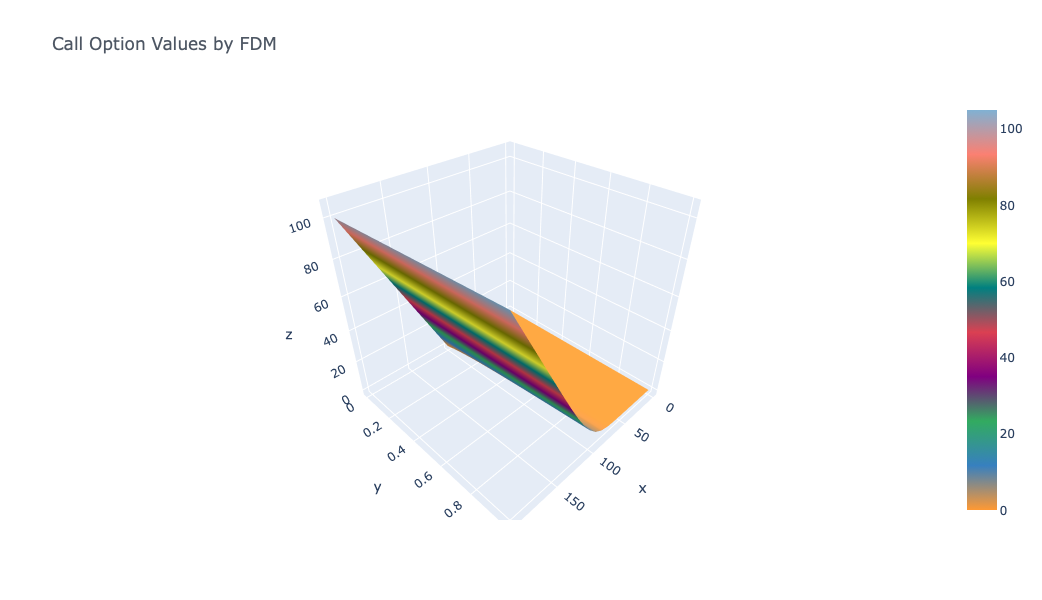

In [11]:
# Plot Call Option Payoff
grid.iplot(kind='surface', title='Call Option Values by FDM')

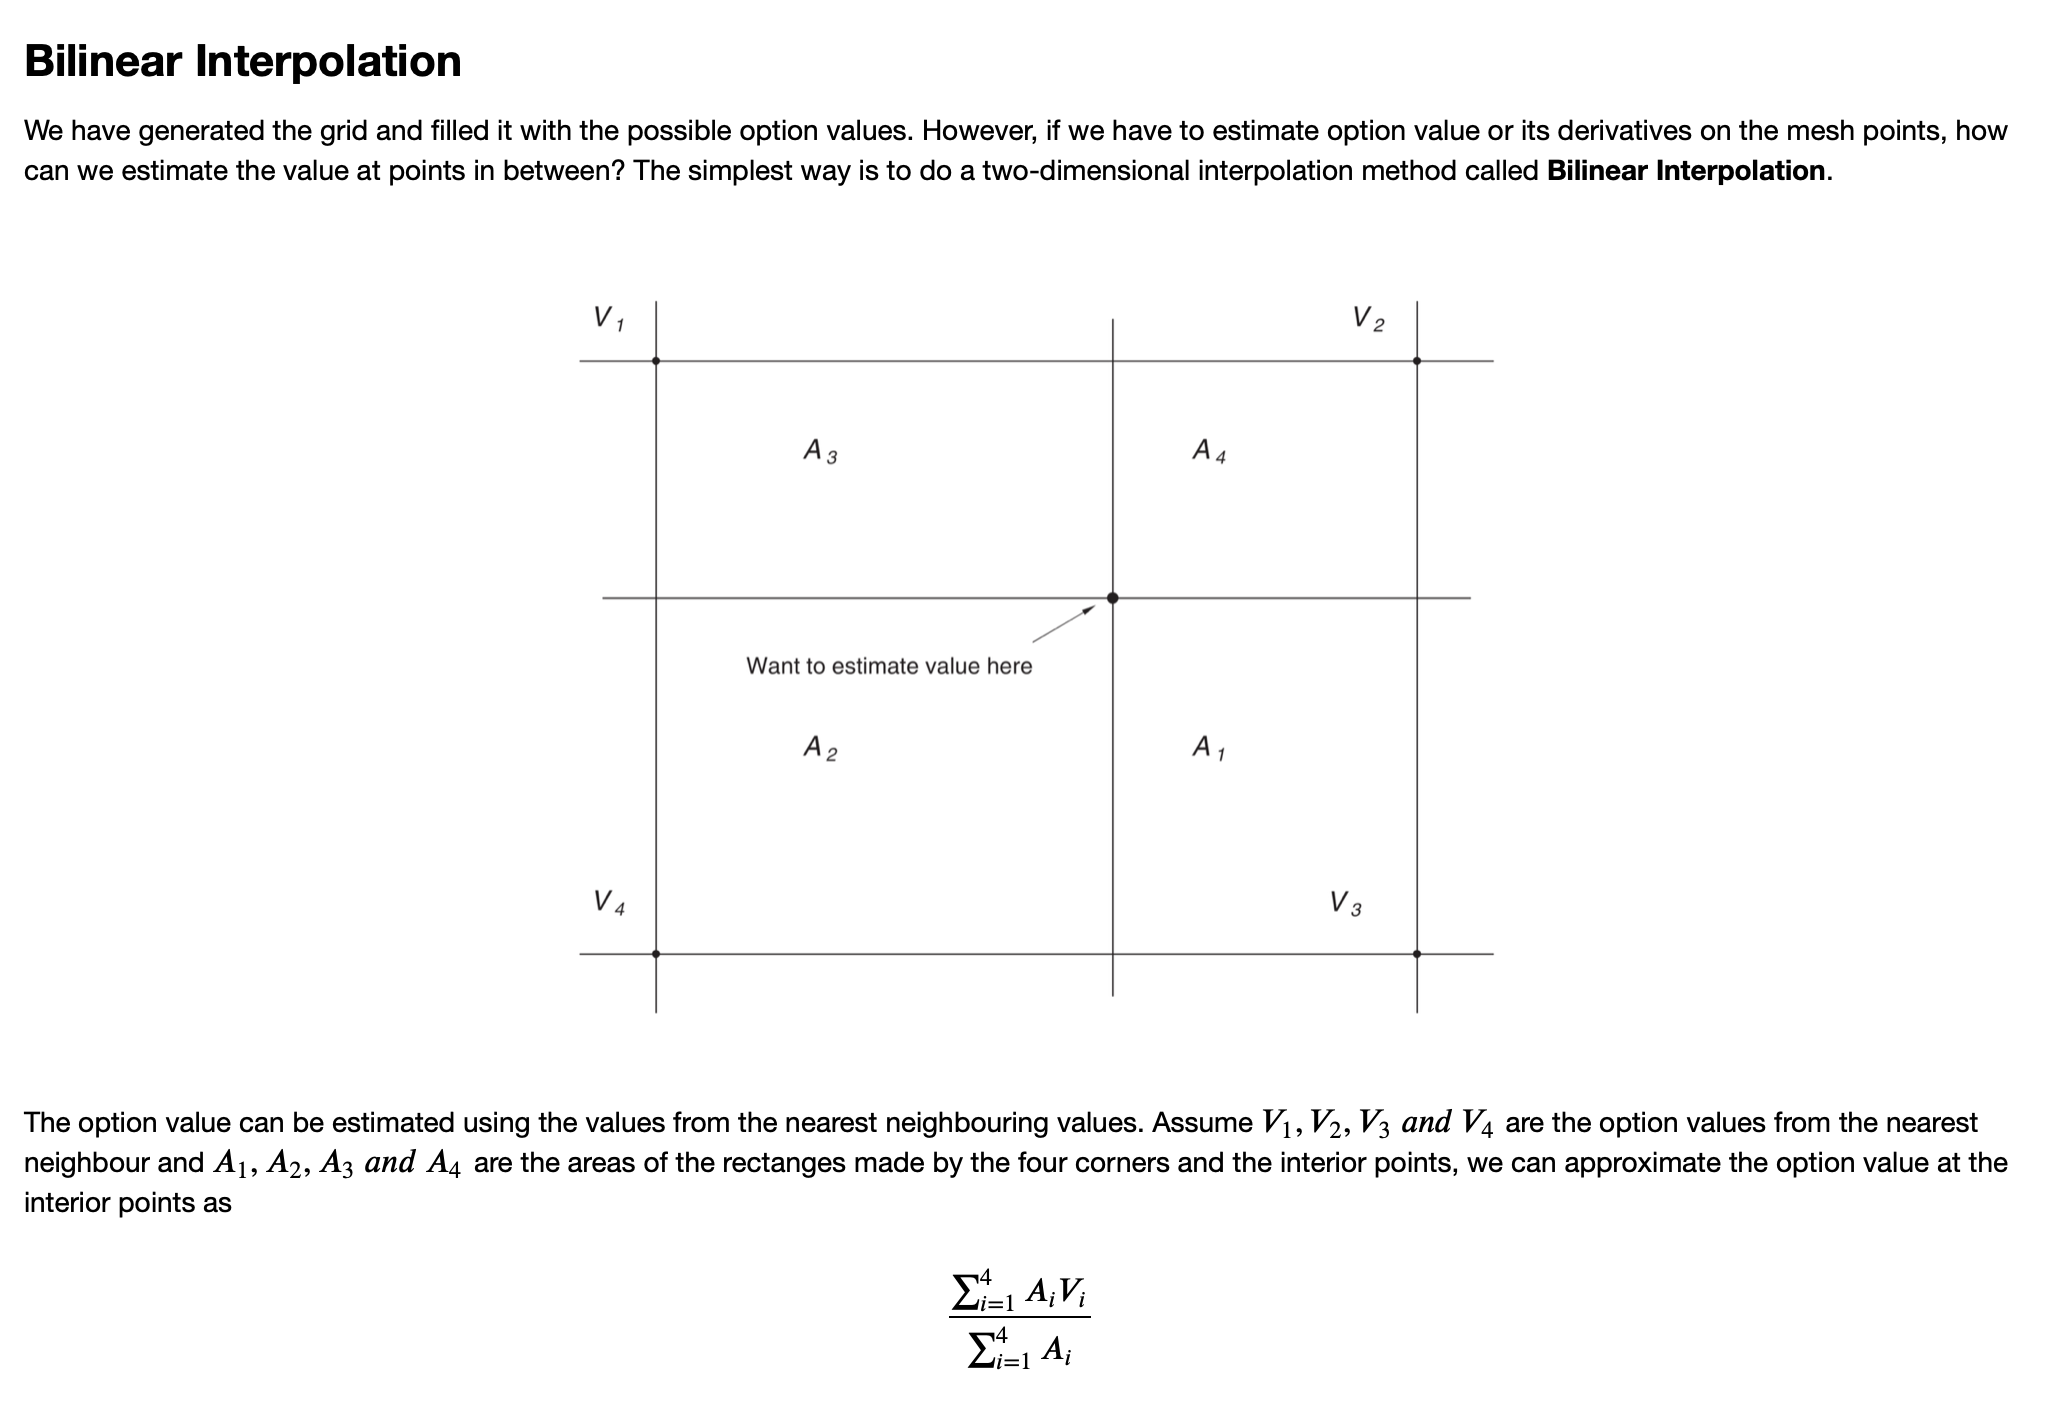

In [12]:
# col1
grid.columns[grid.columns<0.25][-1]

0.222

In [13]:
# col2
grid.columns[grid.columns>=0.25][0]

0.278

In [14]:
# define bilinear interp function
def bilinear_interpolation(asset_price,ttm,df):

    # find relevant row and columns
    col1= df.columns[df.columns<ttm][-1]
    col2 = df.columns[df.columns>=ttm][0]
    row1 = df.index[df.index<asset_price][-1]
    row2 = df.index[df.index>=asset_price][0]

    # define points and areas
    # V1, V2, V3, V4
    V = [df.loc[row1, col1], df.loc[row1, col2],
        df.loc[row2,col2], df.loc[row2, col1]]

    # A1, A2, A3, A4
    A = [(row2-asset_price)*(col2-ttm),
        (row2-asset_price)*(ttm-col1),
        (asset_price-row1)*(ttm-col1),
        (asset_price-row1)*(col2-ttm)
    ]

    # interpolate the values
    return sum(array(A)*array(V)) / sum(array(A))

In [15]:
# Option value, approximated
bilinear_interpolation(105,0.25,grid)

7.983999999999998

In [16]:
bilinear_interpolation(115,0.3,grid)

16.9369

## User Defined Function
Let's subsume above grid calculation into a function for ease of use.

In [17]:
def efdm_grid(Strike, Volatility, Rate, TTM, NAS, Flag=1):
    
    # Specify Flag as 1 for calls and -1 for puts
    
    ds = 2*Strike/NAS                   # asset step size
    dt = 0.9/Volatility**2/NAS**2       # for stability
    
    NTS = int(TTM / dt) + 1             # time step size, alternatively use fixed size 10 on stability issue 
    dt = TTM/NTS                        # time step
    
    s = arange(0,(NAS+1)*ds,ds)
    t = TTM-arange(NTS*dt,-dt,-dt)
    
    # Initialize the grid with zeros
    grid = zeros((len(s),len(t)))
    grid = pd.DataFrame(grid, index=s, columns=around(t,2))
    
    # Set boundary condition at Expiration
    grid.iloc[:,0] = abs(maximum(Flag * (s - Strike), 0))
        
    for k in range(1, len(t)):
        for i in range(1,len(s)-1):
            delta = (grid.iloc[i+1,k-1] - grid.iloc[i-1,k-1]) / (2*ds)
            gamma = (grid.iloc[i+1,k-1]-2*grid.iloc[i,k-1]+grid.iloc[i-1,k-1]) / (ds**2)
            theta = (-0.5* vol**2 * s[i]**2 * gamma) - (r*s[i]*delta) + (r*grid.iloc[i,k-1])

            grid.iloc[i,k] = grid.iloc[i,k-1] - dt*theta
    
        # Set boundary condition at S = 0
        grid.iloc[0,k] = grid.iloc[0,k-1] * (1-r*dt)

        # Set boundary condition at S = infinity
        grid.iloc[len(s)-1,k] = abs(2*(grid.iloc[len(s)-2,k]) - grid.iloc[len(s)-3,k])
            
    # round grid values to 4 decimals
    return around(grid,2)

In [18]:
# put option
fdm_puts = efdm_grid(100,0.2,0.05,1,20,Flag=-1)
fdm_puts

,0.00,0.06,0.11,0.17,0.22,0.28,0.33,0.39,0.44,0.50,0.56,0.61,0.67,0.72,0.78,0.83,0.89,0.94,1.00
0.0,100.0,99.72,99.45,99.17,98.89,98.62,98.34,98.07,97.80,97.53,97.26,96.99,96.72,96.45,96.18,95.91,95.65,95.38,95.12
10.0,90.0,89.72,89.45,89.17,88.89,88.62,88.34,88.07,87.80,87.53,87.26,86.99,86.72,86.45,86.18,85.91,85.65,85.38,85.12
20.0,80.0,79.72,79.45,79.17,78.89,78.62,78.34,78.07,77.80,77.53,77.26,76.99,76.72,76.45,76.18,75.91,75.65,75.38,75.12
30.0,70.0,69.72,69.45,69.17,68.89,68.62,68.34,68.07,67.80,67.53,67.26,66.99,66.72,66.45,66.18,65.91,65.65,65.38,65.12
40.0,60.0,59.72,59.45,59.17,58.89,58.62,58.34,58.07,57.80,57.53,57.26,56.99,56.72,56.45,56.18,55.91,55.65,55.38,55.12
50.0,50.0,49.72,49.45,49.17,48.89,48.62,48.34,48.07,47.80,47.53,47.26,46.99,46.72,46.45,46.18,45.92,45.65,45.39,45.12
60.0,40.0,39.72,39.45,39.17,38.89,38.62,38.35,38.07,37.80,37.53,37.26,36.99,36.73,36.46,36.20,35.94,35.69,35.43,35.18
70.0,30.0,29.72,29.45,29.17,28.89,28.62,28.35,28.09,27.83,27.57,27.32,27.08,26.84,26.61,26.39,26.17,25.96,25.75,25.55
80.0,20.0,19.72,19.45,19.18,18.93,18.70,18.49,18.29,18.11,17.94,17.79,17.65,17.52,17.39,17.28,17.17,17.06,16.96,16.87
90.0,10.0,9.72,9.57,9.50,9.49,9.50,9.53,9.57,9.61,9.66,9.71,9.75,9.80,9.84,9.88,9.92,9.95,9.98,10.01


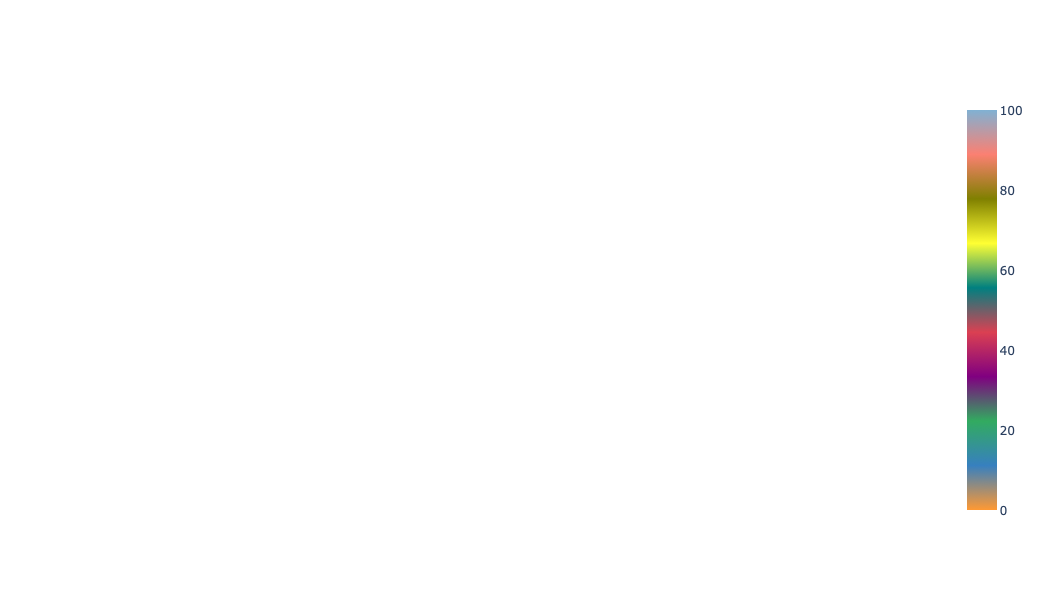

In [19]:
# Visualize the plot for put option
fdm_puts.iplot(kind='surface')

## Convergence Analysis
Let's now compare option pricing for various asset steps (NAS) with black scholes price.

In [20]:
nas_list = [10,20,30,40,50,60]
fdmoption = []

for i in nas_list:
    fdmoption.append(efdm_grid(100,0.2,0.05,1,i).loc[100,1])

fdmoption

[9.51, 10.26, 10.37, 10.4, 10.42, 10.43]

In [21]:
pwd

'/Users/jason/Documents/GitHub/QuantitativeFinance/7. Finite Difference Methods'

In [22]:
# Call black scholes class
from utilities.blackscholes import BS

# instantiate the object
option = BS(100,100,0.05,1,0.20)
bsoption = round(option.callPrice,2)
bsoption = bsoption.repeat(len(nas_list))

bsoption

array([10.45, 10.45, 10.45, 10.45, 10.45, 10.45])

In [23]:
# Subsume into dataframe
df = pd.DataFrame(list(zip(bsoption,fdmoption)), columns=['BS', 'FDM'], index=nas_list)
df['dev'] = df['FDM'] - df['BS']
df['% dev'] = round(df['dev'] / df['BS']*100,2)

# output
print('BS-FDM Convergence over NAS')
df

BS-FDM Convergence over NAS


,BS,FDM,dev,% dev
10,10.45,9.51,-0.94,-9.00
20,10.45,10.26,-0.19,-1.82
30,10.45,10.37,-0.08,-0.77
40,10.45,10.40,-0.05,-0.48
50,10.45,10.42,-0.03,-0.29
60,10.45,10.43,-0.02,-0.19
